# 5.9. ~14 Thurs 'Boston Housing' : regression 2017130772 정준영

### 집 값 예측 프로그램 만들기

step 1. 입.출력 결정 : 출력은 집 값=1개, 입력은 집값에 영향을 미치는 요소들 결정 ex) 지하철역으로부터의 거리(o), 집의 색깔(x), 해당 지역 세금(o), 그 지역의 정치적 경향(?) 등

step 2. 가능한 입력의 갯수를 줄이는 것이 좋음(입력이 많으면 data수집이 힘듦), 좋은 예측을 만들어낼 최소의 입력갯수 정하기(솎아내기)  ex) 해당 지역 교통량
- 입력과 출력의 데이터 모아서 plot해서 명백한 관계성(correlation)이 보이면(positive or negative) 그 입력은 솎아내지 않고 포함, 특별히 관계성이 보이지 않으면 입력에서 제외함.

https://www.kaggle.com/c/boston-housing  : 13개 변수(입력), 1개의 출력(=medv:집 값)

보스톤을 대상으로 만든 프로그램을 다른 지역에 사용해 그 지역의 집값 예측가능

* input elements
 - crim : per capita crime rate by town.  :  도시별 1인당 범죄율
 - zn : proportion of residential land zoned for lots over 25,000 sq.ft. : 25000제곱피트 이상지역에 대해  주거지 비율
 - indus : proportion of non-retail business acres per town. : 마을 당 비소매(도매) 사업 에이커(면적) 비율
 - chas : Charles River dummy variable(categorical 요소를 숫자로 표현하는데 사용하는 것) (= 1 if tract bounds river; 0 otherwise). : 찰스 강 인접여부 
 - nox : nitrogen oxides concentration (parts per 10 million). : 질소 산화물 농도
 - rm : average number of rooms per dwelling. : 주택 당 평균 방 수
 - age : proportion of owner-occupied units built prior to 1940. : 1940년 이전에 건설된 소유주 거주 주택 비율
 - dis : weighted mean of distances to five Boston employment centres. : 5개의 보스턴 고용센터까지 거리의 가중평균(접근성)
 - rad : index of accessibility to radial highways. : 방사형 고속도로 접근성 지수
 - tax : full-value property-tax rate per $10,000. : 1만달러 당 완전가치 재산세 비율
 - ptratio : pupil-teacher ratio by town. : 마을 별 학생-교사 비율 
 - black : 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town. : 마을 별 흑인 비율 
 - lstat : lower status of the population (percent). : 하위 계층의 비율
 
 
* output 
 - medv : median value of owner-occupied homes in \$1000s. : 1000달러 대 소유자 거주 주택의 미디언 값 

#### 아래 이미지 필기 참고

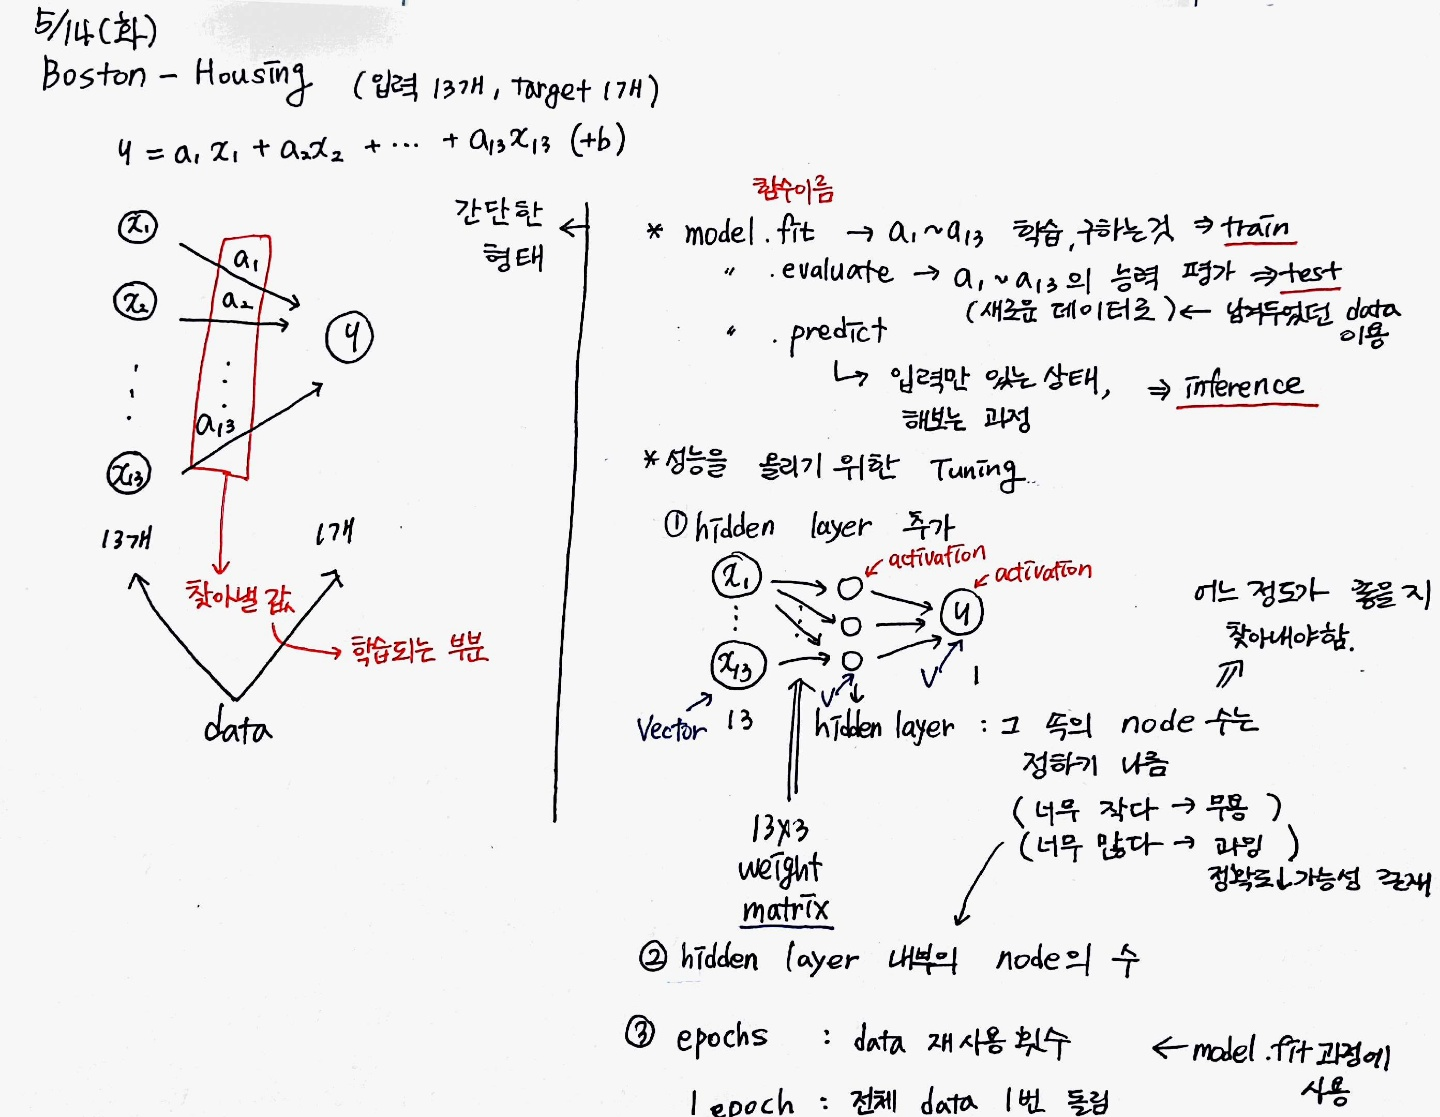

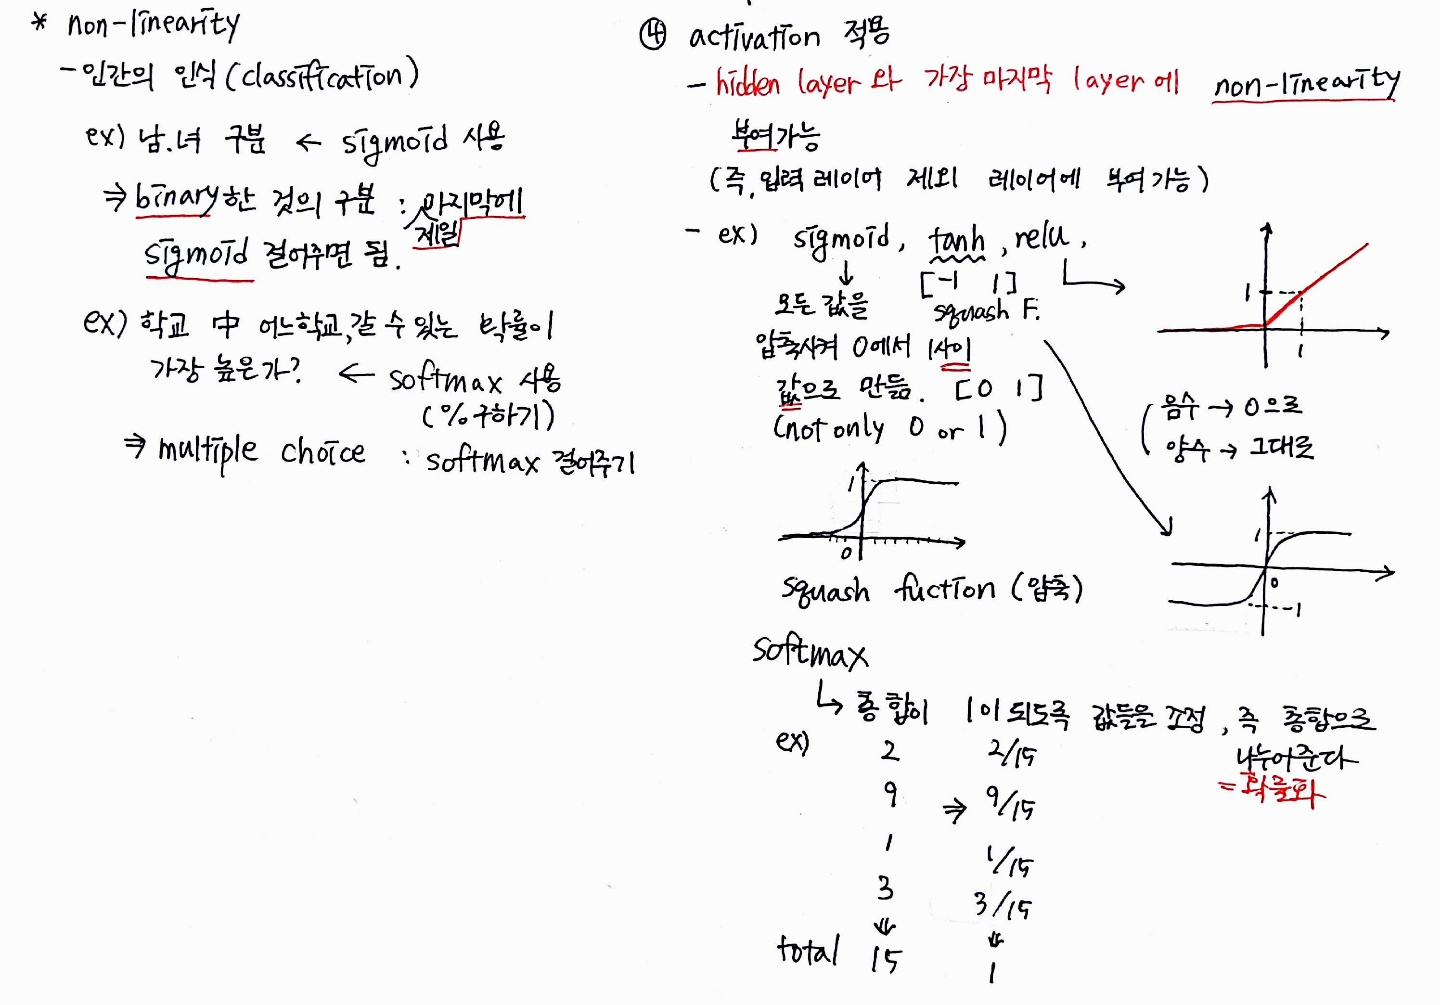

In [1]:
# Tensorflow and tf.keras
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

In [2]:
(x_train, y_train), (x_test, y_test) = tensorflow.keras.datasets.boston_housing.load_data(path='boston_housing.npz')  
# train data와 test data로 나누어서 받음 

In [3]:
print(x_train.shape)  # 13개짜리 벡터가 404개, 즉 data는 404개 존재
print(y_train.shape) # x와 y는 paired 된 data 이므로 갯수가 동일 
print(x_test.shape) # 102개의 data를 테스트 용으로 보관
print(y_test.shape)

(404, 13)
(404,)
(102, 13)
(102,)


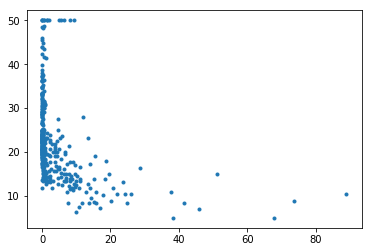

In [4]:
# 좋은 입력요소인지 확인해보기 위해서는(출력값과의 관계성을 확인해보기 위해서는) plot해서 확인해야 함.
plt.plot(x_train[:,0], y_train, '.')  # 13개의 입력 중 첫번째 입력과, 출력값인 가격만 들고 있어야 함
# 집값(y축)이 약 만불에서 5만불, 범죄율 낮을수록 집값 높은 것을 볼 수 있음, 그래프가 직선의 형태는 아님(non-linearity 존재)

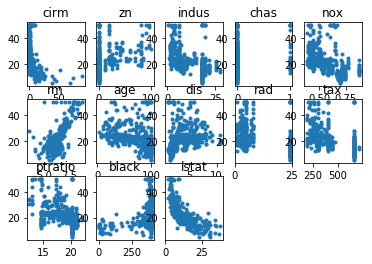

In [6]:
# 입력요소별로 관계성을 살펴보고 입력요소로 선정할지 결정
boston_housing = ['cirm','zn','indus','chas','nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'black','lstat']

for i in range(13):
    plt.subplot(3,5,i+1)   # 3 by 5 칸에 1,2,3 순서대로 plot
    plt.plot(x_train[:,i], y_train, '.')  # 13개 입력 중 i번째 입력과 출력값을 가지고 plot하라.
    plt.title(boston_housing[i])  # title로 위의 리스트 값을 받아라.
plt.show()

# rm: 확실히 linear함을 느낄수 있음, lstat: 하위계층 적을 수록 집값 높음을 확실히 알 수 있음, tax : 택스가 높으면 집값이 떨어짐

* activation: hidden layer에 줄 수 있음. sigmoid, tanh,relu 등
 - regression일 때는 마지막 layer에 activation 아무것도 주지 않음.
 - classification일 때는 마지막 layer에 sigmoid(binary)나 softmax(diverse options)주면 됨.
* paramerter number: 항상 입력의 갯수에 상수항 +1이 됨을 기억.

In [17]:
model = Sequential()
model.add(Dense(10, input_shape=[13], activation = 'relu'))  # 입력 13개, 출력 10개(hidden layer의 node :10개)
model.add(Dense(20))     # node 20개 짜리 2번 hidden layer
model.add(Dense(25))     # node 25개 짜리 3번 hidden layer
model.add(Dense(1))    # 마지막 출력 1개, 즉 집값
model.compile(optimizer='rmsprop', loss='mse')
model.summary()   # parameter number : 화살표의 갯수의미 : 14 (입력값에 따른 wieght 13개에 마지막 상수:  ex) y = ax+b에서 b)
# parameter numer 140 = 14*10(hidden layer node 수) / 사실 hidden layer에도 상수에 따른 node가 하나 생성됨(그 다음 layer로 연결될 때 +1됨) 
# 따라서 11*20 =220이 나옴, 그 다음은 21*25 =525, 마지막은 26*1=26

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 10)                140       
_________________________________________________________________
dense_22 (Dense)             (None, 20)                220       
_________________________________________________________________
dense_23 (Dense)             (None, 25)                525       
_________________________________________________________________
dense_24 (Dense)             (None, 1)                 26        
Total params: 911
Trainable params: 911
Non-trainable params: 0
_________________________________________________________________


In [20]:
# hidden layer를 추가하고 epochs를 늘리면 loss가 약 11에서 12까지 떨어짐을 볼 수 있음

In [23]:
model.fit(x_train, y_train, epochs=1500)   # whole dataset을 1500바퀴 돌려서 학습,훈련해라, epoch 수를 늘리면 loss값이 줄어듦.

Epoch 1/1500
404/404 [==============================] - 0s 98us/sample - loss: 12.2305
Epoch 2/1500
404/404 [==============================] - 0s 95us/sample - loss: 14.2469
Epoch 3/1500
404/404 [==============================] - 0s 84us/sample - loss: 12.2310
Epoch 4/1500
404/404 [==============================] - 0s 84us/sample - loss: 13.3935
Epoch 5/1500
404/404 [==============================] - 0s 87us/sample - loss: 12.5283
Epoch 6/1500
404/404 [==============================] - 0s 177us/sample - loss: 13.0001
Epoch 7/1500
404/404 [==============================] - 0s 200us/sample - loss: 12.5246
Epoch 8/1500
404/404 [==============================] - 0s 110us/sample - loss: 14.3566
Epoch 9/1500
404/404 [==============================] - 0s 117us/sample - loss: 12.6509
Epoch 10/1500
404/404 [==============================] - 0s 123us/sample - loss: 12.5835
Epoch 11/1500
404/404 [==============================] - 0s 198us/sample - loss: 12.2970
Epoch 12/1500
404/404 [============

404/404 [==============================] - 0s 82us/sample - loss: 13.4978
Epoch 93/1500
404/404 [==============================] - 0s 110us/sample - loss: 13.2407
Epoch 94/1500
404/404 [==============================] - 0s 104us/sample - loss: 12.7873
Epoch 95/1500
404/404 [==============================] - 0s 90us/sample - loss: 12.5908
Epoch 96/1500
404/404 [==============================] - 0s 85us/sample - loss: 11.9343
Epoch 97/1500
404/404 [==============================] - 0s 84us/sample - loss: 12.5520
Epoch 98/1500
404/404 [==============================] - 0s 80us/sample - loss: 13.9955
Epoch 99/1500
404/404 [==============================] - 0s 111us/sample - loss: 13.2713
Epoch 100/1500
404/404 [==============================] - 0s 84us/sample - loss: 12.2670
Epoch 101/1500
404/404 [==============================] - 0s 94us/sample - loss: 13.3044
Epoch 102/1500
404/404 [==============================] - 0s 196us/sample - loss: 13.8659
Epoch 103/1500
404/404 [===============

Epoch 183/1500
404/404 [==============================] - 0s 126us/sample - loss: 13.5188
Epoch 184/1500
404/404 [==============================] - 0s 74us/sample - loss: 11.7178
Epoch 185/1500
404/404 [==============================] - 0s 65us/sample - loss: 13.4729
Epoch 186/1500
404/404 [==============================] - 0s 69us/sample - loss: 13.9252
Epoch 187/1500
404/404 [==============================] - 0s 76us/sample - loss: 12.1400
Epoch 188/1500
404/404 [==============================] - 0s 77us/sample - loss: 12.2610
Epoch 189/1500
404/404 [==============================] - 0s 69us/sample - loss: 12.6287
Epoch 190/1500
404/404 [==============================] - 0s 75us/sample - loss: 11.9487
Epoch 191/1500
404/404 [==============================] - 0s 77us/sample - loss: 12.7355
Epoch 192/1500
404/404 [==============================] - 0s 77us/sample - loss: 12.2553
Epoch 193/1500
404/404 [==============================] - 0s 69us/sample - loss: 13.2670
Epoch 194/1500
404/4

404/404 [==============================] - 0s 116us/sample - loss: 12.5937
Epoch 275/1500
404/404 [==============================] - 0s 81us/sample - loss: 12.2084
Epoch 276/1500
404/404 [==============================] - 0s 77us/sample - loss: 12.0647
Epoch 277/1500
404/404 [==============================] - 0s 109us/sample - loss: 13.9356
Epoch 278/1500
404/404 [==============================] - 0s 84us/sample - loss: 11.9780
Epoch 279/1500
404/404 [==============================] - 0s 84us/sample - loss: 13.1722
Epoch 280/1500
404/404 [==============================] - 0s 91us/sample - loss: 13.7086
Epoch 281/1500
404/404 [==============================] - 0s 81us/sample - loss: 11.8757
Epoch 282/1500
404/404 [==============================] - 0s 84us/sample - loss: 12.7014
Epoch 283/1500
404/404 [==============================] - 0s 79us/sample - loss: 12.5011
Epoch 284/1500
404/404 [==============================] - 0s 109us/sample - loss: 14.1484
Epoch 285/1500
404/404 [=========

404/404 [==============================] - 0s 81us/sample - loss: 13.8642
Epoch 367/1500
404/404 [==============================] - 0s 71us/sample - loss: 11.4770
Epoch 368/1500
404/404 [==============================] - 0s 74us/sample - loss: 13.3220
Epoch 369/1500
404/404 [==============================] - 0s 79us/sample - loss: 11.8042
Epoch 370/1500
404/404 [==============================] - 0s 81us/sample - loss: 14.0453
Epoch 371/1500
404/404 [==============================] - 0s 74us/sample - loss: 11.6276
Epoch 372/1500
404/404 [==============================] - 0s 79us/sample - loss: 12.9721
Epoch 373/1500
404/404 [==============================] - 0s 80us/sample - loss: 12.6980
Epoch 374/1500
404/404 [==============================] - 0s 79us/sample - loss: 12.7025
Epoch 375/1500
404/404 [==============================] - 0s 87us/sample - loss: 12.4723
Epoch 376/1500
404/404 [==============================] - 0s 75us/sample - loss: 12.0984
Epoch 377/1500
404/404 [============

404/404 [==============================] - 0s 82us/sample - loss: 12.8567
Epoch 458/1500
404/404 [==============================] - 0s 79us/sample - loss: 12.0769
Epoch 459/1500
404/404 [==============================] - 0s 79us/sample - loss: 11.8297
Epoch 460/1500
404/404 [==============================] - 0s 78us/sample - loss: 13.3071
Epoch 461/1500
404/404 [==============================] - 0s 90us/sample - loss: 12.3220
Epoch 462/1500
404/404 [==============================] - 0s 79us/sample - loss: 12.0103
Epoch 463/1500
404/404 [==============================] - 0s 85us/sample - loss: 12.2870
Epoch 464/1500
404/404 [==============================] - 0s 97us/sample - loss: 12.4390
Epoch 465/1500
404/404 [==============================] - 0s 81us/sample - loss: 12.2562
Epoch 466/1500
404/404 [==============================] - 0s 96us/sample - loss: 13.1807
Epoch 467/1500
404/404 [==============================] - 0s 86us/sample - loss: 11.5471
Epoch 468/1500
404/404 [============

404/404 [==============================] - 0s 77us/sample - loss: 11.9808
Epoch 549/1500
404/404 [==============================] - 0s 71us/sample - loss: 12.0095
Epoch 550/1500
404/404 [==============================] - 0s 82us/sample - loss: 12.6490
Epoch 551/1500
404/404 [==============================] - 0s 95us/sample - loss: 11.7970
Epoch 552/1500
404/404 [==============================] - 0s 69us/sample - loss: 11.7040
Epoch 553/1500
404/404 [==============================] - 0s 74us/sample - loss: 11.6560
Epoch 554/1500
404/404 [==============================] - 0s 79us/sample - loss: 12.9457
Epoch 555/1500
404/404 [==============================] - 0s 83us/sample - loss: 11.7486
Epoch 556/1500
404/404 [==============================] - 0s 96us/sample - loss: 11.9662
Epoch 557/1500
404/404 [==============================] - 0s 100us/sample - loss: 13.3005
Epoch 558/1500
404/404 [==============================] - 0s 86us/sample - loss: 12.0613
Epoch 559/1500
404/404 [===========

Epoch 640/1500
404/404 [==============================] - 0s 77us/sample - loss: 11.9583
Epoch 641/1500
404/404 [==============================] - 0s 91us/sample - loss: 12.9328
Epoch 642/1500
404/404 [==============================] - 0s 79us/sample - loss: 11.8087
Epoch 643/1500
404/404 [==============================] - 0s 70us/sample - loss: 11.7119
Epoch 644/1500
404/404 [==============================] - 0s 81us/sample - loss: 11.7941
Epoch 645/1500
404/404 [==============================] - 0s 68us/sample - loss: 12.5417
Epoch 646/1500
404/404 [==============================] - 0s 82us/sample - loss: 12.3657
Epoch 647/1500
404/404 [==============================] - 0s 77us/sample - loss: 11.3205
Epoch 648/1500
404/404 [==============================] - 0s 116us/sample - loss: 12.8173
Epoch 649/1500
404/404 [==============================] - 0s 74us/sample - loss: 12.5785
Epoch 650/1500
404/404 [==============================] - 0s 79us/sample - loss: 12.5303
Epoch 651/1500
404/4

404/404 [==============================] - 0s 87us/sample - loss: 13.6842
Epoch 732/1500
404/404 [==============================] - 0s 99us/sample - loss: 11.7697
Epoch 733/1500
404/404 [==============================] - 0s 81us/sample - loss: 11.9355
Epoch 734/1500
404/404 [==============================] - 0s 186us/sample - loss: 12.0007
Epoch 735/1500
404/404 [==============================] - 0s 77us/sample - loss: 12.7148
Epoch 736/1500
404/404 [==============================] - 0s 87us/sample - loss: 11.3266
Epoch 737/1500
404/404 [==============================] - 0s 86us/sample - loss: 11.4477
Epoch 738/1500
404/404 [==============================] - 0s 72us/sample - loss: 11.7353
Epoch 739/1500
404/404 [==============================] - 0s 79us/sample - loss: 12.7228
Epoch 740/1500
404/404 [==============================] - 0s 74us/sample - loss: 12.6079
Epoch 741/1500
404/404 [==============================] - 0s 77us/sample - loss: 11.0212
Epoch 742/1500
404/404 [===========

404/404 [==============================] - 0s 94us/sample - loss: 12.1244
Epoch 823/1500
404/404 [==============================] - 0s 84us/sample - loss: 12.5795
Epoch 824/1500
404/404 [==============================] - 0s 91us/sample - loss: 11.2395
Epoch 825/1500
404/404 [==============================] - 0s 87us/sample - loss: 11.7726
Epoch 826/1500
404/404 [==============================] - 0s 81us/sample - loss: 10.8588
Epoch 827/1500
404/404 [==============================] - 0s 94us/sample - loss: 14.2753
Epoch 828/1500
404/404 [==============================] - ETA: 0s - loss: 7.591 - 0s 81us/sample - loss: 11.5238
Epoch 829/1500
404/404 [==============================] - 0s 93us/sample - loss: 12.7269
Epoch 830/1500
404/404 [==============================] - 0s 96us/sample - loss: 11.8923
Epoch 831/1500
404/404 [==============================] - 0s 227us/sample - loss: 13.0002
Epoch 832/1500
404/404 [==============================] - 0s 96us/sample - loss: 12.4238
Epoch 833/1

404/404 [==============================] - 0s 152us/sample - loss: 12.2438
Epoch 914/1500
404/404 [==============================] - 0s 99us/sample - loss: 11.6405
Epoch 915/1500
404/404 [==============================] - 0s 93us/sample - loss: 12.7419
Epoch 916/1500
404/404 [==============================] - 0s 110us/sample - loss: 10.9155
Epoch 917/1500
404/404 [==============================] - 0s 127us/sample - loss: 12.7229
Epoch 918/1500
404/404 [==============================] - 0s 118us/sample - loss: 11.5688
Epoch 919/1500
404/404 [==============================] - 0s 82us/sample - loss: 11.8505
Epoch 920/1500
404/404 [==============================] - 0s 81us/sample - loss: 11.3501
Epoch 921/1500
404/404 [==============================] - 0s 91us/sample - loss: 12.5270
Epoch 922/1500
404/404 [==============================] - 0s 93us/sample - loss: 11.5942
Epoch 923/1500
404/404 [==============================] - 0s 116us/sample - loss: 12.2337
Epoch 924/1500
404/404 [=======

404/404 [==============================] - 0s 95us/sample - loss: 10.9484
Epoch 1005/1500
404/404 [==============================] - 0s 103us/sample - loss: 11.4273
Epoch 1006/1500
404/404 [==============================] - 0s 75us/sample - loss: 12.1064
Epoch 1007/1500
404/404 [==============================] - 0s 68us/sample - loss: 11.6034
Epoch 1008/1500
404/404 [==============================] - 0s 95us/sample - loss: 11.4857
Epoch 1009/1500
404/404 [==============================] - 0s 85us/sample - loss: 12.0546
Epoch 1010/1500
404/404 [==============================] - 0s 70us/sample - loss: 10.7374
Epoch 1011/1500
404/404 [==============================] - 0s 72us/sample - loss: 10.9998
Epoch 1012/1500
404/404 [==============================] - 0s 75us/sample - loss: 11.4263
Epoch 1013/1500
404/404 [==============================] - 0s 83us/sample - loss: 12.4885
Epoch 1014/1500
404/404 [==============================] - 0s 69us/sample - loss: 11.2361
Epoch 1015/1500
404/404 [

Epoch 1094/1500
404/404 [==============================] - 0s 81us/sample - loss: 11.6994
Epoch 1095/1500
404/404 [==============================] - 0s 86us/sample - loss: 11.7154
Epoch 1096/1500
404/404 [==============================] - 0s 80us/sample - loss: 11.8878
Epoch 1097/1500
404/404 [==============================] - 0s 81us/sample - loss: 11.8583
Epoch 1098/1500
404/404 [==============================] - 0s 81us/sample - loss: 11.0734
Epoch 1099/1500
404/404 [==============================] - 0s 73us/sample - loss: 12.2214
Epoch 1100/1500
404/404 [==============================] - 0s 69us/sample - loss: 11.7779
Epoch 1101/1500
404/404 [==============================] - 0s 74us/sample - loss: 11.2894
Epoch 1102/1500
404/404 [==============================] - 0s 67us/sample - loss: 10.9900
Epoch 1103/1500
404/404 [==============================] - 0s 92us/sample - loss: 12.0043
Epoch 1104/1500
404/404 [==============================] - 0s 116us/sample - loss: 12.1531
Epoch 110

404/404 [==============================] - 0s 69us/sample - loss: 10.5267
Epoch 1185/1500
404/404 [==============================] - 0s 74us/sample - loss: 11.5902
Epoch 1186/1500
404/404 [==============================] - 0s 94us/sample - loss: 10.9020
Epoch 1187/1500
404/404 [==============================] - 0s 109us/sample - loss: 12.4156
Epoch 1188/1500
404/404 [==============================] - 0s 121us/sample - loss: 11.1505
Epoch 1189/1500
404/404 [==============================] - 0s 94us/sample - loss: 11.4601
Epoch 1190/1500
404/404 [==============================] - 0s 84us/sample - loss: 11.5626
Epoch 1191/1500
404/404 [==============================] - 0s 75us/sample - loss: 12.2796
Epoch 1192/1500
404/404 [==============================] - 0s 69us/sample - loss: 11.3315
Epoch 1193/1500
404/404 [==============================] - 0s 76us/sample - loss: 10.9980
Epoch 1194/1500
404/404 [==============================] - 0s 77us/sample - loss: 11.4271
Epoch 1195/1500
404/404 

404/404 [==============================] - 0s 209us/sample - loss: 11.3744
Epoch 1275/1500
404/404 [==============================] - 0s 435us/sample - loss: 10.4893
Epoch 1276/1500
404/404 [==============================] - 0s 121us/sample - loss: 11.9672
Epoch 1277/1500
404/404 [==============================] - 0s 112us/sample - loss: 11.3827
Epoch 1278/1500
404/404 [==============================] - 0s 119us/sample - loss: 10.7871
Epoch 1279/1500
404/404 [==============================] - 0s 96us/sample - loss: 10.6323
Epoch 1280/1500
404/404 [==============================] - 0s 101us/sample - loss: 11.5529
Epoch 1281/1500
404/404 [==============================] - 0s 95us/sample - loss: 11.6985
Epoch 1282/1500
404/404 [==============================] - 0s 91us/sample - loss: 11.5993
Epoch 1283/1500
404/404 [==============================] - 0s 106us/sample - loss: 10.9766
Epoch 1284/1500
404/404 [==============================] - 0s 103us/sample - loss: 12.3126
Epoch 1285/1500
40

404/404 [==============================] - 0s 190us/sample - loss: 11.2225
Epoch 1365/1500
404/404 [==============================] - 0s 236us/sample - loss: 10.7869
Epoch 1366/1500
404/404 [==============================] - 0s 94us/sample - loss: 11.9451
Epoch 1367/1500
404/404 [==============================] - 0s 120us/sample - loss: 10.5847
Epoch 1368/1500
404/404 [==============================] - 0s 93us/sample - loss: 11.6331
Epoch 1369/1500
404/404 [==============================] - 0s 104us/sample - loss: 11.2728
Epoch 1370/1500
404/404 [==============================] - 0s 131us/sample - loss: 10.5251
Epoch 1371/1500
404/404 [==============================] - 0s 114us/sample - loss: 10.7476
Epoch 1372/1500
404/404 [==============================] - 0s 96us/sample - loss: 10.8158
Epoch 1373/1500
404/404 [==============================] - 0s 85us/sample - loss: 11.4694
Epoch 1374/1500
404/404 [==============================] - 0s 101us/sample - loss: 11.1102
Epoch 1375/1500
404

404/404 [==============================] - 0s 72us/sample - loss: 11.0781
Epoch 1455/1500
404/404 [==============================] - 0s 115us/sample - loss: 10.6199
Epoch 1456/1500
404/404 [==============================] - 0s 84us/sample - loss: 10.9444
Epoch 1457/1500
404/404 [==============================] - 0s 83us/sample - loss: 11.0933
Epoch 1458/1500
404/404 [==============================] - 0s 69us/sample - loss: 10.9356
Epoch 1459/1500
404/404 [==============================] - 0s 78us/sample - loss: 11.0292
Epoch 1460/1500
404/404 [==============================] - 0s 76us/sample - loss: 12.1357
Epoch 1461/1500
404/404 [==============================] - 0s 67us/sample - loss: 10.6394
Epoch 1462/1500
404/404 [==============================] - 0s 81us/sample - loss: 10.2804
Epoch 1463/1500
404/404 [==============================] - 0s 74us/sample - loss: 11.1359
Epoch 1464/1500
404/404 [==============================] - 0s 86us/sample - loss: 10.9821
Epoch 1465/1500
404/404 [

훈련할 때 사용하지 않은 데이터(전체 데이터에서 약 20% 떼어놨다가)로 테스트 해본다.

In [24]:
model.evaluate(x_test, y_test)

102/102 [==============================] - 0s 88us/sample - loss: 25.9368


25.93684476964614

In [25]:
print(model.input_shape)   # input에 얼마나 들어가는지 알려줌
print(model.output_shape)

(None, 13)
(None, 1)


predict: 실제로 예측이 가능한지 해 봄

In [26]:
model.predict(np.array([0,1,50,1,0,5,.5,10,1000,100,10,100,1]).reshape(1,13))

array([[640.1523]], dtype=float32)

# Practice

In [27]:
# lowering 
model.predict(np.array([5,1,40,1,0,4,.3,15,800,120,15,120,2]).reshape(1,13))

array([[496.70413]], dtype=float32)

In [28]:
# higher
model.predict(np.array([0,1,60,1,0,7,.2,17,1200,80,5,0,0]).reshape(1,13))

array([[770.5143]], dtype=float32)